In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

data = pd.read_excel("./candyhierarchy2017.xlsx")
data 


/Users/kridsadee/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,90314359,No,Male,24,USA,MD,JOY,DESPAIR,MEH,DESPAIR,...,Fruit Stripe Gum,NaN,White and gold,NaN,Friday,NaN,NaN,NaN,NaN,NaN
2456,90314580,No,Female,33,USA,New York,MEH,DESPAIR,JOY,NaN,...,Capers,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 26)"
2457,90314634,No,Female,26,USA,Tennessee,MEH,DESPAIR,JOY,DESPAIR,...,NaN,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(67, 35)"
2458,90314658,No,Male,58,Usa,North Carolina,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
list(data)

['Internal ID',
 'Q1: GOING OUT?',
 'Q2: GENDER',
 'Q3: AGE',
 'Q4: COUNTRY',
 'Q5: STATE, PROVINCE, COUNTY, ETC',
 'Q6 | 100 Grand Bar',
 'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
 'Q6 | Any full-sized candy bar',
 'Q6 | Black Jacks',
 'Q6 | Bonkers (the candy)',
 'Q6 | Bonkers (the board game)',
 'Q6 | Bottle Caps',
 "Q6 | Box'o'Raisins",
 'Q6 | Broken glow stick',
 'Q6 | Butterfinger',
 'Q6 | Cadbury Creme Eggs',
 'Q6 | Candy Corn',
 'Q6 | Candy that is clearly just the stuff given out for free at restaurants',
 'Q6 | Caramellos',
 'Q6 | Cash, or other forms of legal tender',
 'Q6 | Chardonnay',
 'Q6 | Chick-o-Sticks (we don’t know what that is)',
 'Q6 | Chiclets',
 'Q6 | Coffee Crisp',
 'Q6 | Creepy Religious comics/Chick Tracts',
 'Q6 | Dental paraphenalia',
 'Q6 | Dots',
 'Q6 | Dove Bars',
 'Q6 | Fuzzy Peaches',
 'Q6 | Generic Brand Acetaminophen',
 'Q6 | Glow sticks',
 'Q6 | Goo Goo Clusters',
 "Q6 | Good N' Plenty",
 'Q6 | Gum fro

In [261]:
# Drop useless columns
data.drop(['Unnamed: 113', 'Internal ID', 'Q9: OTHER COMMENTS', 'Click Coordinates (x, y)', 'Q8: DESPAIR OTHER', 'Q7: JOY OTHER', ], axis='columns', inplace = True)

In [262]:
# rename columns 
new_names = {'Q1: GOING OUT?': 'going out', 'Q2: GENDER':'sex', 'Q3: AGE': 'age', \
    'Q4: COUNTRY': 'country', 'Q5: STATE, PROVINCE, COUNTY, ETC': 'state', \
    'Q10: DRESS':'dress', 'Q11: DAY':'day', 'Q12: MEDIA [Daily Dish]':'daily dish',\
        'Q12: MEDIA [Science]':'science', 'Q12: MEDIA [ESPN]':'espn', 'Q12: MEDIA [Yahoo]':'yahoo'}

data.rename(columns = new_names, inplace=True)

In [263]:
data.shape

(2460, 114)

In [264]:
# checking how many missing in each columns (scrollable element not show that why I use .head(60))
data.isnull().sum().head(60)

going out                                                                                  110
sex                                                                                         41
age                                                                                         84
country                                                                                     64
state                                                                                      100
Q6 | 100 Grand Bar                                                                         747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     734
Q6 | Any full-sized candy bar                                                              672
Q6 | Black Jacks                                                                           958
Q6 | Bonkers (the candy)                                                                   992
Q6 | Bonkers (the board game)                     

In [265]:
data.isnull().sum().tail(60)

Q6 | Lindt Truffle                                                              718
Q6 | Lollipops                                                                  691
Q6 | Mars                                                                       725
Q6 | Maynards                                                                  1024
Q6 | Mike and Ike                                                               729
Q6 | Milk Duds                                                                  693
Q6 | Milky Way                                                                  688
Q6 | Regular M&Ms                                                               675
Q6 | Peanut M&M’s                                                               671
Q6 | Blue M&M's                                                                 727
Q6 | Red M&M's                                                                  729
Q6 | Green Party M&M's                                                      

<p style="font-size:30px; color:blue; font-weight: bold" >Cleaning "going out"</p>

In [266]:
# print unique values to see how many value we have to work on it
data['going out'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [267]:
# fill in the missing with word 'Maybe' in it
data['going out'].fillna('Maybe', inplace=True)

print("Number of missing data: " + str(data['going out'].isnull().sum()))
print()
print(data['going out'].unique())
# print percent of each values
data['going out'].value_counts(normalize=True) * 100


Number of missing data: 0

['Maybe' 'No' 'Yes']


going out
No       82.845528
Yes      12.682927
Maybe     4.471545
Name: proportion, dtype: float64

<p style="font-size:30px; color: blue; font-weight: bold;">Cleaning "sex"</p>

In [268]:
data['sex'].unique()

array([nan, 'Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [269]:
# rename value inside and fill in maissing value
data['sex'].replace({"I'd rather not say":"Don't say", "Other": "Don't say"}, inplace=True)
data['sex'].fillna("Don't say", inplace=True)

print("Number of missing data: " + str(data['sex'].isnull().sum()))
print()
print(data['sex'].unique())
data['sex'].value_counts(normalize=True) * 100

Number of missing data: 0

["Don't say" 'Male' 'Female']


sex
Male         59.634146
Female       34.105691
Don't say     6.260163
Name: proportion, dtype: float64

<p style="font-size:30px; color: blue; font-weight: bold;">Cleaning "age"</p>

In [270]:
data['age'].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [271]:
# convert values to number "errors='coerce" (if there are non-numeric values pandas should replace those values with NaN (Not a Number))
data['age'] = pd.to_numeric(data['age'], errors= 'coerce')
data['age'].fillna(np.nan, inplace=True)
# summary statistics
data['age'].describe()

count    2352.000000
mean       42.617304
std        23.846531
min         1.000000
25%        34.000000
50%        41.000000
75%        50.000000
max      1000.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

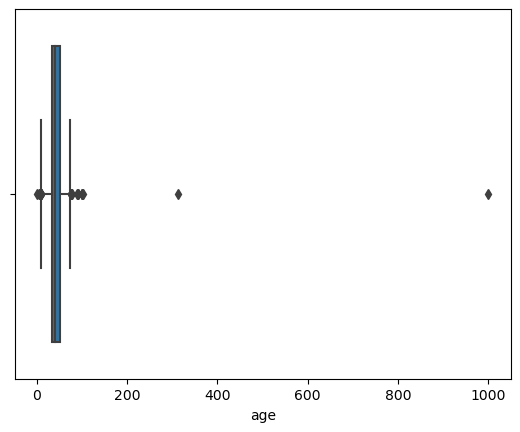

In [272]:
# get an overview of the central tendency and spread of the 'age' variable
sns.boxplot(x=data['age'])

In [273]:
# calculates the lower and upper bounds for potential outliers in the 'age' column based on the Interquartile Range (IQR) method
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
data['age'] = data['age'].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

In [274]:
data['age'].isnull().sum()

135

In [275]:
data['age'].fillna(data['age'].median(), inplace=True)
#convert type to int
data['age'] = data['age'].astype(int)

print("Number of missing data: " + str(data['age'].isnull().sum()))

#checking type
data['age'].dtype

Number of missing data: 0


dtype('int64')

<Axes: xlabel='age'>

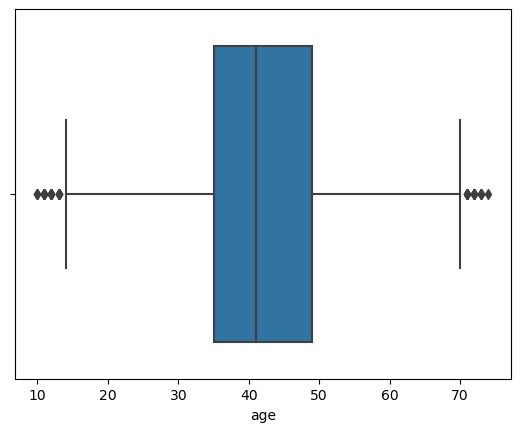

In [276]:
sns.boxplot(x=data['age'])

/var/folders/qf/5v3t42g14tg8cgqq_cpxtgmc0000gn/T/ipykernel_72371/324817021.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['age'], shade=True )


<Axes: xlabel='age', ylabel='Density'>

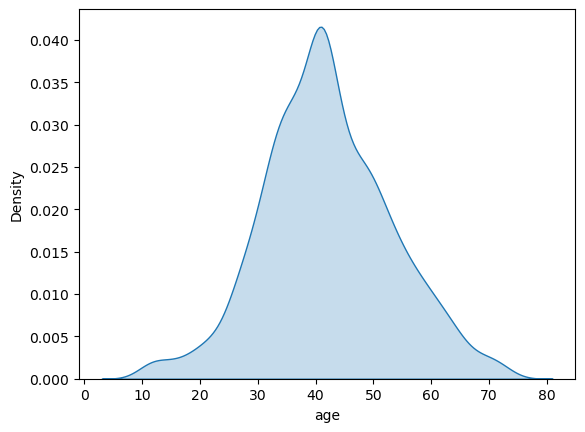

In [277]:
# This plot can provide insights into the underlying distribution of the 'age' variable and help identify potential patterns or anomalies.
sns.kdeplot(data['age'], shade=True )

<p style="font-size:30px; color: blue; font-weight: bold;">Cleaning "country"</p>

In [278]:
data['country'].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

In [279]:
# we used fuzzywuzzy to deal with the problem of different writing ways. (read more infomation in README file)
from fuzzywuzzy import process

val_countries = ['usa', 'united states', 'united states of america', 'america', 'uk', 'england', 'united kingdom', \
    'japan', 'canada', 'france', 'germany', 'spain', 'australia', 'sweden', 'switzerland', 'netherlands', 'norway']

data['country'] = data['country'].str.lower()
for country in val_countries:
        matches = process.extract(country, data['country'], limit=data.shape[0])
        for sub in matches:
            if sub[1] >= 80:
                data.loc[data['country'] == sub[0], 'country'] = country

In [280]:
data['country'].unique()

array([nan, 'usa', 'canada', 'murica', 'america', 'uk', 'uae', 'england',
       'mexico', 'u.s.a.', 'france', 'finland', 'north carolina ',
       'netherlands', 'germany', 'europe', 'earth', 'costa rica',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', 'pittsburgh', 'canae', 'new york',
       'trumpistan', 'ireland', 'korea', 'california', 'japan',
       'south africa', 'iceland', 'scotland', 'denmark', 'switzerland',
       'ud', 'scotland ', 'south korea', 'new jersey', 'indonesia',
       'atlantis', 'murrika', 'alaska', 'soviet canuckistan', 'singapore',
       'china', 'taiwan', 'ireland ', 'hong kong', 'spain', 'sweden',
       'narnia', 'u s a', 'subscribe to dm4uz3 on youtube',
       "i don't know anymore", 'fear and loathing'], dtype=object)

In [281]:
true_countries = {'america': 'usa', 'murica':'usa', 'u.s.a.':'usa', 'england':'uk', 'new york': 'usa', 'north carolina': 'usa', 'cascadia':'usa', \
    'usa? hard to tell anymore..':'usa', 'pittsburgh':'usa', 'canae':'canada', 'california':'usa', 'ud':'uk', 'new jersey':'usa', 'soviet canuckistan':'canada', \
        'murrika':'usa', 'u s a':'usa', 'hong kong': 'china'}

data['country'].replace(true_countries, inplace=True)
data['country'].value_counts(normalize=True) * 100

country
usa                               86.240067
canada                             9.535759
uk                                 0.920117
germany                            0.418235
netherlands                        0.292765
australia                          0.292765
japan                              0.209118
mexico                             0.167294
scotland                           0.167294
china                              0.167294
france                             0.125471
switzerland                        0.125471
ireland                            0.125471
sweden                             0.083647
denmark                            0.083647
subscribe to dm4uz3 on youtube     0.041824
atlantis                           0.041824
i don't know anymore               0.041824
singapore                          0.041824
alaska                             0.041824
narnia                             0.041824
taiwan                             0.041824
south korea             

In [282]:
last_countries = ['usa', 'canada', 'uk', 'germany', 'australia', 'netherlands', 'japan',\
    'china', 'mexico', 'scotland', 'france', 'switzerland', 'ireland']

data['country'] = data['country'].apply(lambda x: x if x in last_countries else 'other')
print(data['country'].value_counts(normalize=True) * 100)
print()
print("Number of missing data: " + str(data['country'].isnull().sum()))

country
usa            83.821138
canada          9.268293
other           3.983740
uk              0.894309
germany         0.406504
netherlands     0.284553
australia       0.284553
japan           0.203252
mexico          0.162602
scotland        0.162602
china           0.162602
france          0.121951
ireland         0.121951
switzerland     0.121951
Name: proportion, dtype: float64

Number of missing data: 0


<p style="font-size:30px; color: blue; font-weight:bold;">Cleaning state</p>

In [283]:
data['state'].unique()

array([nan, 'NM', 'Virginia', 'or', 'exton pa', 'Colorado ', 'ontario',
       'Ontario', 'Wa', 'Quebec', 'NY', 'California', 'Texas', 'NEW YORK',
       'CO', 'IN', 'MN', 'aberdeenshire', 'Alberta', 'Wisconsin, 53705',
       'RI', 'NC', 'Scotland', 'minnesota', 'Michigan', 'Florida',
       'New Jersey', 'VA', 'Colorado', 'Los Angeles, California', 'CA',
       'New York ', 'Chicago, Illinois', 'Nj', 'Wisconsin', 'Minnesota ',
       'London', 'mn', 'TEXAS', 'Illinois', 'District of Columbia',
       'Washington', 'Massachusetts ', 'OR', 'Montana', 'New York',
       'massachusetts', 'Abu Dhabi', 'TX', 'Arizona', 'Dc', 'yukon',
       'Pennsylvania ', 'MD', 'Ohio', 'Alberta ', 'OXFORDSHIRE', 'DC',
       'Iowa', 'Mn', 'TN', 'BC', 'Maryland', 'MI', 'Wisconsin ', 'alaska',
       'Ny', 'Colorado, Jefferson county ', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska ', 'Oregon', 'UT', 'ny',
       'Pennsylvania', 'CDMX', 'north carolina', 'Tennessee ', 'Texas ',
       'Knox cou

In [284]:
#We have a lot of state names, so we can drop it off.
data.drop('state', axis='columns', inplace=True)

<p style="font-size:30px; color: blue; font-weight:bold;">Cleaning Q6 columns</p>

In [285]:
# loop across data columns started with Q6 and fill in missing value by 'Unknown'
for col in data.columns:
    if col.startswith('Q6'):
        data[col].fillna('Unknown', inplace=True)

In [286]:
for col in data.columns:
    if col.startswith('Q6'):
        print(f"{col}: {data[col].isnull().sum()}")

Q6 | 100 Grand Bar: 0
Q6 | Anonymous brown globs that come in black and orange wrappers	(a.k.a. Mary Janes): 0
Q6 | Any full-sized candy bar: 0
Q6 | Black Jacks: 0
Q6 | Bonkers (the candy): 0
Q6 | Bonkers (the board game): 0
Q6 | Bottle Caps: 0
Q6 | Box'o'Raisins: 0
Q6 | Broken glow stick: 0
Q6 | Butterfinger: 0
Q6 | Cadbury Creme Eggs: 0
Q6 | Candy Corn: 0
Q6 | Candy that is clearly just the stuff given out for free at restaurants: 0
Q6 | Caramellos: 0
Q6 | Cash, or other forms of legal tender: 0
Q6 | Chardonnay: 0
Q6 | Chick-o-Sticks (we don’t know what that is): 0
Q6 | Chiclets: 0
Q6 | Coffee Crisp: 0
Q6 | Creepy Religious comics/Chick Tracts: 0
Q6 | Dental paraphenalia: 0
Q6 | Dots: 0
Q6 | Dove Bars: 0
Q6 | Fuzzy Peaches: 0
Q6 | Generic Brand Acetaminophen: 0
Q6 | Glow sticks: 0
Q6 | Goo Goo Clusters: 0
Q6 | Good N' Plenty: 0
Q6 | Gum from baseball cards: 0
Q6 | Gummy Bears straight up: 0
Q6 | Hard Candy: 0
Q6 | Healthy Fruit: 0
Q6 | Heath Bar: 0
Q6 | Hershey's Dark Chocolate: 0
Q6

In [287]:
# loop across data columns starting from column 4 up to column 6 of the end, and rename it by remove first 5 character
for col in data.columns[4:-6]:
    data.rename(columns={col: col[5:]}, inplace=True)

In [288]:
list(data)

['going out',
 'sex',
 'age',
 'country',
 '100 Grand Bar',
 'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
 'Any full-sized candy bar',
 'Black Jacks',
 'Bonkers (the candy)',
 'Bonkers (the board game)',
 'Bottle Caps',
 "Box'o'Raisins",
 'Broken glow stick',
 'Butterfinger',
 'Cadbury Creme Eggs',
 'Candy Corn',
 'Candy that is clearly just the stuff given out for free at restaurants',
 'Caramellos',
 'Cash, or other forms of legal tender',
 'Chardonnay',
 'Chick-o-Sticks (we don’t know what that is)',
 'Chiclets',
 'Coffee Crisp',
 'Creepy Religious comics/Chick Tracts',
 'Dental paraphenalia',
 'Dots',
 'Dove Bars',
 'Fuzzy Peaches',
 'Generic Brand Acetaminophen',
 'Glow sticks',
 'Goo Goo Clusters',
 "Good N' Plenty",
 'Gum from baseball cards',
 'Gummy Bears straight up',
 'Hard Candy',
 'Healthy Fruit',
 'Heath Bar',
 "Hershey's Dark Chocolate",
 'Hershey’s Milk Chocolate',
 "Hershey's Kisses",
 'Hugs (actual physical hugs)',
 'Jolly Ranch

<p style="font-size:30px; color: blue; font-weight:bold;">Cleaning dress</p>

In [289]:
data['dress'].unique()

array([nan, 'White and gold', 'Blue and black'], dtype=object)

In [290]:
data['dress'].fillna('Orter', inplace=True)

print("Number of missing data: " + str(data['dress'].isnull().sum()))
print()
print(data['dress'].unique())
data['dress'].value_counts(normalize=True) * 100

Number of missing data: 0

['Orter' 'White and gold' 'Blue and black']


dress
White and gold    43.943089
Orter             30.243902
Blue and black    25.813008
Name: proportion, dtype: float64

<p style="font-size:30px; color: blue; font-weight:bold;">Cleaning day</p>

In [291]:
data['day'].unique()

array([nan, 'Sunday', 'Friday'], dtype=object)

In [292]:
data['day'].fillna('Orther', inplace=True)

print("Number of missing value: " + str(data['day'].isnull().sum()))
print()
print(data['day'].unique())

data['day'].value_counts() * 100

Number of missing value: 0

['Orther' 'Sunday' 'Friday']


day
Friday    109100
Orther     72500
Sunday     64400
Name: count, dtype: int64

<p style="font-size:30px; color: blue; font-weight:bold;">Cleaning last 4 columns</p>

In [293]:
# only select column that have missing value
data.isnull().sum()[data.isnull().sum() > 0]

daily dish    2375
science       1098
espn          2361
yahoo         2393
dtype: int64

In [294]:
# loop through last 4 columns
for col in data.columns[-4:]:
    print(f"{col}")
    print(data[col].unique())


daily dish
[nan  1.]
science
[nan  1.]
espn
[nan  1.]
yahoo
[nan  1.]


In [295]:
for col in data.columns[-4:]:
    data[col].fillna(0, inplace=True)

In [296]:
# if the sum of values from these four columns is equal to 0, the value in the 'No page' column will be 1, otherwise it will be 0.
data['No page'] = (data['daily dish'] + data['science'] + data['espn'] + data['yahoo']).apply(lambda x: 1 if x == 0 else 0)

In [297]:
for col in data.columns[-5:]:
    data[col] = data[col].astype(int)
    print(data[col].value_counts(normalize=True) * 100, '\n')

daily dish
0    96.544715
1     3.455285
Name: proportion, dtype: float64 

science
1    55.365854
0    44.634146
Name: proportion, dtype: float64 

espn
0    95.97561
1     4.02439
Name: proportion, dtype: float64 

yahoo
0    97.276423
1     2.723577
Name: proportion, dtype: float64 

No page
0    65.569106
1    34.430894
Name: proportion, dtype: float64 



<p style="font-size:30px; color: blue; font-weight:bold;">Final Check</p>

In [298]:
pd.DataFrame({"Type": data.dtypes, "Null": [data[col].isnull().sum() for col in data.columns]})

,Type,Null
going out,object,0
sex,object,0
age,int64,0
country,object,0
100 Grand Bar,object,0
...,...,...
daily dish,int64,0
science,int64,0
espn,int64,0
yahoo,int64,0


In [299]:
des = data.describe(include=['O'])
des

,going out,sex,country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,...,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,dress,day
count,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,...,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460
unique,3,3,14,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,3,3
top,No,Male,usa,JOY,DESPAIR,JOY,Unknown,Unknown,Unknown,Unknown,...,DESPAIR,JOY,DESPAIR,Unknown,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday
freq,2038,1467,2062,873,1089,1559,958,992,1006,765,...,836,1413,1146,789,840,1455,1289,1105,1081,1091


These are the 10 most loved chocolates:


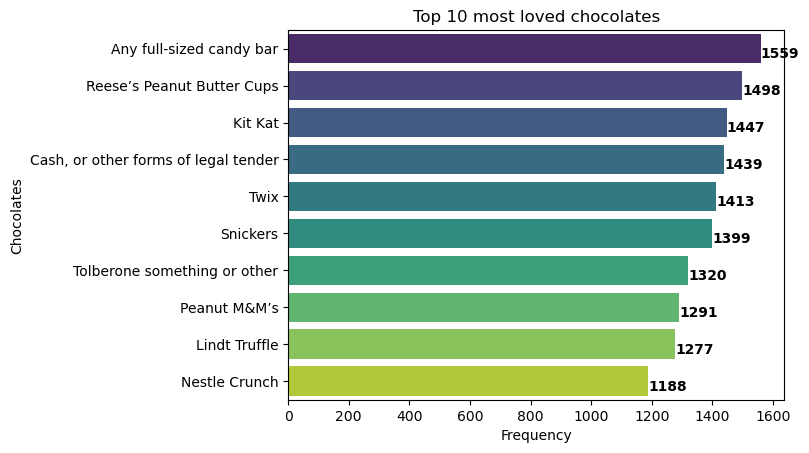

In [300]:
des_2 = des.iloc[[2, 3], 3:-2].T
print("These are the 10 most loved chocolates:")
top_joy = des_2.sort_values(by='freq', ascending=False)[des_2.sort_values(by='freq', ascending=False)['top'] == "JOY"].head(10)


ax = sns.barplot(y = top_joy.index, x = 'freq', palette = 'viridis', data=top_joy)
for i, v in enumerate(top_joy['freq']):
    ax.text(v + 1, i + .25, str(round(v, 2)), color='black', fontweight='bold')
plt.title("Top 10 most loved chocolates")
plt.xlabel("Frequency")
plt.ylabel("Chocolates")
plt.show()

These are the 10 most hated chocolates:


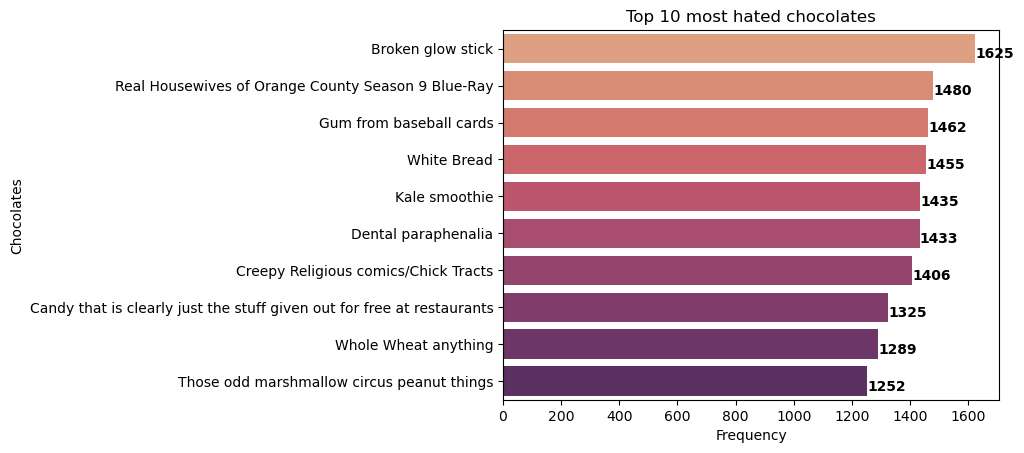

In [301]:
print("These are the 10 most hated chocolates:")

top_despair = des_2.sort_values(by='freq', ascending=False)[des_2.sort_values(by='freq', ascending=False)['top'] == "DESPAIR"].head(10)

ax = sns.barplot(y = top_despair.index, x = 'freq', palette = 'flare', data=top_despair)
for i, v in enumerate(top_despair['freq']):
    ax.text(v + 1, i + .25, str(round(v, 2)), color='black', fontweight='bold')
plt.title("Top 10 most hated chocolates")
plt.xlabel("Frequency")
plt.ylabel("Chocolates")
plt.show()